In [16]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

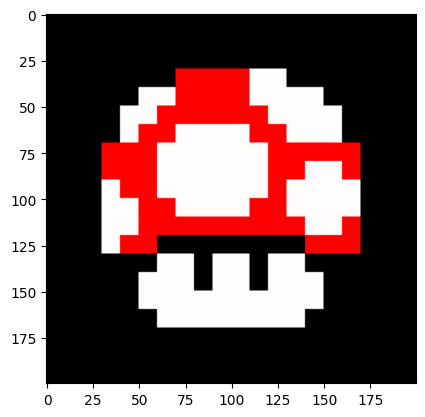

In [17]:
img = cv2.imread("../../data/mushroom.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    shapes[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
    # plt.show()

    # bOut = out[: ,: ,0]
    # gOut = out[: ,: ,1]
    # rOut = out[: ,: ,2]

    # bImg = img[:,:,0]
    # gImg = img[:,:,1]
    # rImg= img[:,:,2]

    return np.sum(np.abs(np.subtract(img[mask],shapes[mask]))) 

    # b  = f1_score(bImg, bOut, average='micro')
    # g =  f1_score(gImg, gOut, average='micro')
    # r =  f1_score(rImg, rOut, average='micro')
    # return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.2], out, img) #X,Y,r,R,G,B,alpha

40188

In [19]:
def draw_circle(vec, out):
    # shapes = np.zeros_like(out, np.uint8)

    # cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    # mask = out.astype(bool)
    # out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.show()

# Scipy Differential Evolution

In [20]:
from scipy.optimize import differential_evolution

In [21]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [3,(w+h)/4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.5,1], # alpha
]

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 9248
     nit: 87
 success: True
       x: array([108.37939481,  82.61300019,   3.80690297, 252.10013026,
       253.25931777, 254.92307133,   0.99812267])


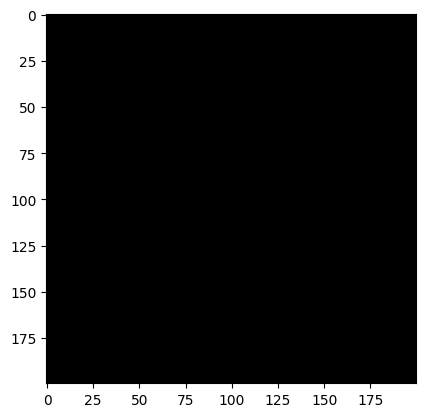

In [23]:
nIter = 1
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img))
    print(res)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    res
    draw_circle(res.x, out)
    

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.